In [1]:
import pandas as pd
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#"pip install ml_insights" in terminal if needed
import ml_insights as mli

pd.options.display.max_columns = 999



/Users/Rachel/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
rawdata = [line.rstrip('\n') for line in open('1991.txt')]

In [3]:
###(99) means that haven't replaced the unknown value with NaN yet
data_dict=[]

for i,row in enumerate(rawdata):
    id_dict = {}
    id_dict['birth-year']=int(row[6:10])
    id_dict['USresident']=int(row[10])
    id_dict['facility']=int(row[11]) #9 unknown
    id_dict['doctor']=int(row[12]) #9 unknown
    id_dict['birth-state']=int(row[13:15])
    id_dict['birth-county']=int(row[15:18]) #county are numbered alphabetically, 999=ocunty pop<250,000
    id_dict['resident-state']=int(row[18:20])
    id_dict['resident-county']=int(row[20:23]) ###999=ocunty pop<250,000
    id_dict['mother-age']=int(row[29:31])
    id_dict['mother-age-range']=int(row[31]) #1:age<15, 2: 15-19 years, 3: 20-24 yrs, 4 incremental
    id_dict['mother-race']=int(row[35:37])
    id_dict['mother-educ-years']=int(row[40]) #6 not stated; 1: 0-8 yrs, 2:9-11yrs, 3: 12yrs, 4:13-15yrs, 5:>16yrs
    id_dict['mother-marry']=int(row[42])
    id_dict['mother-birth-place']=int(row[29:31]) #99 not classifiable
    id_dict['mother-total-birth']=int(row[46:48]) #99 unknown
    id_dict['mother-live-birth']=int(row[48:50]) #99 unknown
    id_dict['month-prenatal-care1']=int(row[50:52]) #99 unknown 00: no care
    id_dict['month-prenatal-care2']=int(row[52]) #5 unknown    #in trimesters, 4 no care, 1:1st trimester
    id_dict['prenatal-visits']=int(row[53:55]) #99 unknown
    id_dict['care-adequacy']=int(row[55] )#4 unknown
    id_dict['month-since-last-birth']=int(row[56:59]) #999 unknown, 777 no previous birth, 0: plural birth
    id_dict['father-age']=int(row[60:62]) #99 is unknown
    id_dict['father-race']=int(row[64:66]) #99 is unknown
    id_dict['birth-month']=int(row[69:71])
    id_dict['gestation-week']=int(row[72:74]) #99 unknown
    id_dict['gestation-week-range']=int(row[74:76]) #10 not stated #01: under 20 weeks, 09: >42 weeks
    id_dict['sex']=int(row[77]) 
    id_dict['birth-weight']=int(row[78:82]) #9999 unknown
    id_dict['birth-weight-recode']=int(row[84]) #4 unknown #1:very low weight, 2:low weight, 3: normal
    id_dict['plurality']=int(row[86]) 
    id_dict['delivery-method']=int(row[98]) ###(5) unknown
    id_dict['tobacco']=int(row[117]) #9 unknown, 1 yes, 2 no
    id_dict['cigarette-number-day']=int(row[118:120]) #99 unknown
    id_dict['alcohol']=int(row[121]) #9 unknown, 1 yes, 2 no
    id_dict['drink-number-week']=int(row[122:124]) #99 unknown
    id_dict['weight-gain']=int(row[125:127]) #99 unknown
    id_dict['weight-gain-recode']=int(row[127]) #9 unknown
    id_dict['birth-day-of-week']=int(row[206]) #1:sunday
    id_dict['birth-race']=int(row[208:210])
    
    data_dict.append(id_dict)



In [4]:
len(data_dict)

4115494

In [5]:
# #output the entire data_dict list to csv file 
# keys = data_dict[0].keys()
# with open('data.csv', 'w') as output_file:
#     dict_writer = csv.DictWriter(output_file, keys)
#     dict_writer.writeheader()
#     dict_writer.writerows(data_dict)

## randomly select 200,000 observations for testing

In [6]:
random.seed(5)
def sample(iterable, n):
    reservoir = []
    for t, item in enumerate(iterable):
        if t < n:
            reservoir.append(item)
        else:
            m = random.randint(0,t)
            if m < n:
                reservoir[m] = item
    return reservoir

#sample 10,000 observations randomly 
df1=sample(data_dict, 20000)
#turn data list into a dataframe
data1=pd.DataFrame(df1)
#save the sample to a csv file
# data1.to_csv('data1.csv', index=False)

In [7]:
#replacing all NaN valus in the data with np.NaN
data1.facility.replace({9: np.NaN}, inplace=True)
data1.doctor.replace({9: np.NaN}, inplace=True)
data1['mother-educ-years'].replace({6: np.NaN}, inplace=True)
data1['mother-birth-place'].replace({99: np.NaN}, inplace=True)
data1['mother-total-birth'].replace({99: np.NaN}, inplace=True)
data1['mother-live-birth'].replace({99: np.NaN}, inplace=True)
data1['month-prenatal-care1'].replace({99: np.NaN}, inplace=True)
data1['month-prenatal-care2'].replace({5: np.NaN}, inplace=True)
data1['prenatal-visits'].replace({99: np.NaN}, inplace=True)
data1['care-adequacy'].replace({4: np.NaN}, inplace=True)
data1['gestation-week'].replace({99: np.NaN}, inplace=True)
data1['gestation-week-range'].replace({10: np.NaN}, inplace=True)
data1['birth-weight'].replace({9999: np.NaN}, inplace=True)
data1['birth-weight-recode'].replace({4: np.NaN}, inplace=True)
data1['tobacco'].replace({9: np.NaN}, inplace=True)
data1['cigarette-number-day'].replace({99: np.NaN}, inplace=True)
data1['alcohol'].replace({9: np.NaN}, inplace=True)
data1['drink-number-week'].replace({99: np.NaN}, inplace=True)
data1['weight-gain'].replace({99: np.NaN}, inplace=True)
data1['weight-gain-recode'].replace({9: np.NaN}, inplace=True)
data1['month-since-last-birth'].replace({999:np.NaN}, inplace=True)
data1['month-since-last-birth'].replace({777:-24}, inplace=True)
data1['father-age'].replace({99:np.NaN},inplace=True)
data1['father-race'].replace({99:np.NaN},inplace=True)




In [8]:
data1=data1.dropna(how ='any')

In [10]:
data1.columns


Index(['USresident', 'alcohol', 'birth-county', 'birth-day-of-week',
       'birth-month', 'birth-race', 'birth-state', 'birth-weight',
       'birth-weight-recode', 'birth-year', 'care-adequacy',
       'cigarette-number-day', 'delivery-method', 'doctor',
       'drink-number-week', 'facility', 'father-age', 'father-race',
       'gestation-week', 'gestation-week-range', 'month-prenatal-care1',
       'month-prenatal-care2', 'month-since-last-birth', 'mother-age',
       'mother-age-range', 'mother-birth-place', 'mother-educ-years',
       'mother-live-birth', 'mother-marry', 'mother-race',
       'mother-total-birth', 'plurality', 'prenatal-visits', 'resident-county',
       'resident-state', 'sex', 'tobacco', 'weight-gain',
       'weight-gain-recode'],
      dtype='object')

In [11]:
#very imbalanced sample: 1 are extremely underweight babies, 2 are underweight babies, and 3 are normal babies
data1.groupby('birth-weight-recode').describe()

#combine 1 and 2 to form an underweight indicator
data1['underweight']=data1['birth-weight-recode']
data1['underweight'].replace({2:1}, inplace=True)
data1['underweight'].replace({3:0}, inplace=True)

In [12]:
##Select Parameters
selected_columns=[ 'birth-month',  'father-age',  'month-since-last-birth', 'mother-age',
                  'prenatal-visits', 'resident-state', 'weight-gain','alcohol','tobacco',
                  'mother-race','father-race']
X=data1.loc[:,selected_columns]
y=data1.underweight
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)

## Model:  SVM

In [13]:
#grid search for the best C and Gamma in SVM
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 5e-3,1e-3],
                     'C': [1]}]
clf = GridSearchCV(svm.SVC(C=1), tuned_parameters, cv=5)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

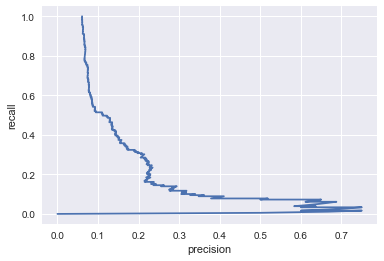

In [14]:
model_svm = svm.SVC(kernel='rbf', gamma = 0.003, probability=True,C=2.5)
model_svm.fit(X_train, y_train)
y_prob_pred_mat_svm=model_svm.predict_proba(X_test)
y_prob_pred_svm=y_prob_pred_mat_svm[:,1]
#precision-recall curve
prec, recall, thresholds = precision_recall_curve(y_test,y_prob_pred_svm)
plt.plot(prec[0:-1], recall[0:-1])
plt.xlabel('precision')
plt.ylabel('recall')

## Conduct a random forest to select the features
## Using random permutation to select the features.

In [15]:
# datar=pd.DataFrame()
# datar['underweight']=data1['underweight']
# for i in selected_columns:
#     datar[i]=np.random.randint(min(data1[i]),max(data1[i])+1,len(data1))
# Xr=data1.loc[:,[ 'birth-month', 'father-age', 'month-since-last-birth', 'mother-age', 
#                   'prenatal-visits', 'weight-gain']] 
# Xr['month-prenatal-care1r']=datar['month-prenatal-care1']
# yr=datar.underweight
# Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.3,random_state=4444)##RandomForestClassifier

# rfmodelr = RandomForestClassifier()
# rfmodelr.fit(Xr_train,yr_train)
# sorted(list(zip(Xr.columns,rfmodelr.feature_importances_)), key=lambda x: x[1], reverse=True)


## Random Forest Analysis

In [16]:
parameters = {'n_estimators':[1000,2500,5000],
             'min_samples_leaf':[1,2]}

model = RandomForestClassifier()
grid_search = GridSearchCV(model, parameters, n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [17]:
##RandomForestClassifier
rfmodel = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
rfmodel.fit(X_train,y_train)
sorted(list(zip(X.columns,rfmodel.feature_importances_)), key=lambda x: x[1], reverse=True)


[('weight-gain', 0.15576732294277143),
 ('month-since-last-birth', 0.14901634080083501),
 ('prenatal-visits', 0.14376825127190263),
 ('resident-state', 0.13499404196939679),
 ('mother-age', 0.12981296013281227),
 ('father-age', 0.12804491500391701),
 ('birth-month', 0.10290584286913079),
 ('tobacco', 0.01960918926197389),
 ('mother-race', 0.017740149646017091),
 ('father-race', 0.014594462623354504),
 ('alcohol', 0.0037465234778887046)]

In [18]:
rfmodel.score(X_test,y_test)

0.93899561846983481

In [19]:
y_prob_pred_mat_rf=rfmodel.predict_proba(X_test)
y_prob_pred_rf=y_prob_pred_mat_rf[:,1]


In [20]:
#first comparison of metric: log-loss score, based on y_prob_pred
log_loss(y_test,y_prob_pred_rf), roc_auc_score(y_test,y_prob_pred_rf)

(0.20182207111491918, 0.7552499539126184)

In [21]:
# #hard prediction
# y_pred_rf = rfmodel.predict(X_test)
# print(classification_report(y_test,y_pred_rf),confusion_matrix(y_test, y_pred_rf)),\
# list(zip(['accuracy','precision','recall','f1'], [accuracy_score(y_test, y_pred_rf),
#                                                   precision_score(y_test, y_pred_rf),
#                                                   recall_score(y_test, y_pred_rf),
#                                                   f1_score(y_test, y_pred_rf)]))



In [22]:
# #choose a different threshold, lower the threshold for becoming a 1

# y_pred_rf2 = (y_prob_pred_rf>0.2).astype(int)
# print(classification_report(y_test,y_pred_rf2),confusion_matrix(y_test, y_pred_rf2)),\
# list(zip(['accuracy','precision','recall','f1'], [accuracy_score(y_test, y_pred_rf2),
#                                                   precision_score(y_test, y_pred_rf2,average='weighted'),
#                                                   recall_score(y_test, y_pred_rf2,average='weighted'),
#                                                   f1_score(y_test, y_pred_rf2,average='weighted')]))

# #want high recall in the 1.0 category s.t. when the baby is underweight
# #we have higher probability to predict that the baby is underweight
# #precision is low for 1.0 category: when I predict that baby is underweight, I'm correct 34% of time

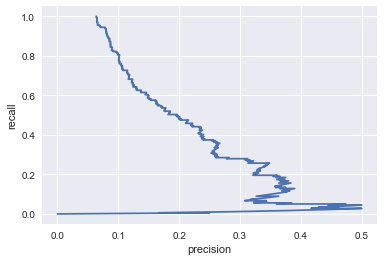

In [23]:
#precision-recall curve
prec, recall, thresholds = precision_recall_curve(y_test,y_prob_pred_rf)
plt.plot(prec[0:-1], recall[0:-1])
plt.xlabel('precision')
plt.ylabel('recall')

0.7552499539126184

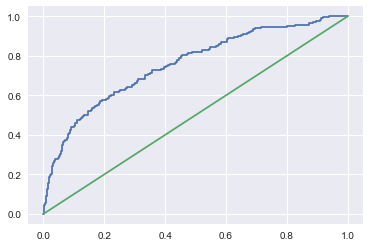

In [24]:
fpr, tpr, thresholds = roc_curve(y_test,y_prob_pred_rf)
plt.plot(fpr, tpr) #fpr=1-specificity=recall
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))
roc_auc_score(y_test,y_prob_pred_rf)

## Model 2: Gradient Boosting

In [25]:
parameters = {'n_estimators':[1000,2500,5000],
             'min_samples_leaf':[1,2],
             'learning_rate':[0.001,0.005,0.01,0.05]}

model = GradientBoostingClassifier()
grid_search = GridSearchCV(model, parameters)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=2,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1000, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [26]:
gbmodel = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=2,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1000, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
gbmodel.fit(X_train, y_train)
gbmodel.score(X_test,y_test)

0.93764745534209637

In [27]:
y_prob_pred_mat_gb=np.round(gbmodel.predict_proba(X_test),decimals=3) 
y_prob_pred_gb=y_prob_pred_mat_gb[:,1]
#first comparison of metric: log-loss score, based on y_prob_pred
log_loss(y_test,y_prob_pred_gb), roc_auc_score(y_test,y_prob_pred_gb)

(0.19620577082216964, 0.76158296129461456)

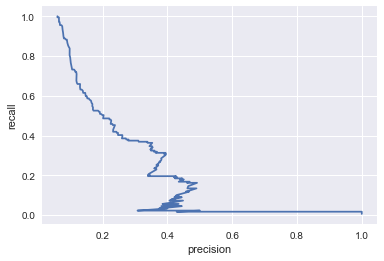

In [28]:
#precision-recall curve
prec, recall, thresholds = precision_recall_curve(y_test,y_prob_pred_gb)
plt.plot(prec[0:-1], recall[0:-1])
plt.xlabel('precision')
plt.ylabel('recall')

In [29]:
# #choose a different threshold, lower the threshold for becoming a 1

# y_pred_gb2 = (y_prob_pred_gb>0.05).astype(int)
# print(classification_report(y_test,y_pred_gb2),confusion_matrix(y_test, y_pred_gb2)),\
# list(zip(['accuracy','precision','recall','f1'], [accuracy_score(y_test, y_pred_gb2),
#                                                   precision_score(y_test, y_pred_gb2),
#                                                   recall_score(y_test, y_pred_gb2),
#                                                   f1_score(y_test, y_pred_gb2)]))

# #want high recall in the 1.0 category s.t. when the baby is underweight
# #we have higher probability to predict that the baby is underweight
# #precision is low for 1.0 category: when I predict that baby is underweight, I'm correct 11% of time

## Coefficient Interpretation

In [30]:
# Side by side histograms showing scores of positive vs negative cases

# fig, ax = plt.subplots(1,2, figsize = (8,4))

# ax[0].hist(y_prob_pred_rf[np.where(y_test==0)],bins=15,range=[0,1]);
# ax[1].hist(y_prob_pred_rf[np.where(y_test==1)],bins=15,range=[0,1]);


In [31]:
mxr = mli.ModelXRay(rfmodel, X_test.iloc[:500,:])

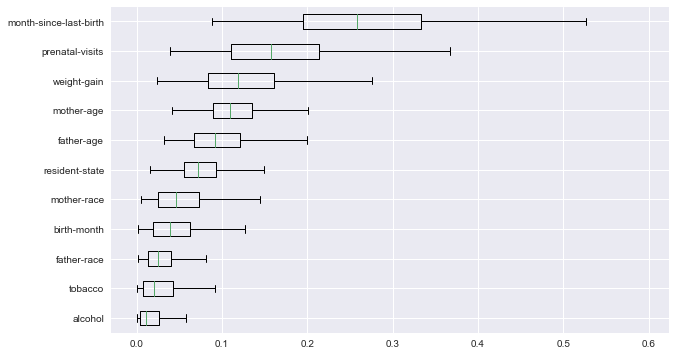

In [32]:
mxr.feature_effect_summary()

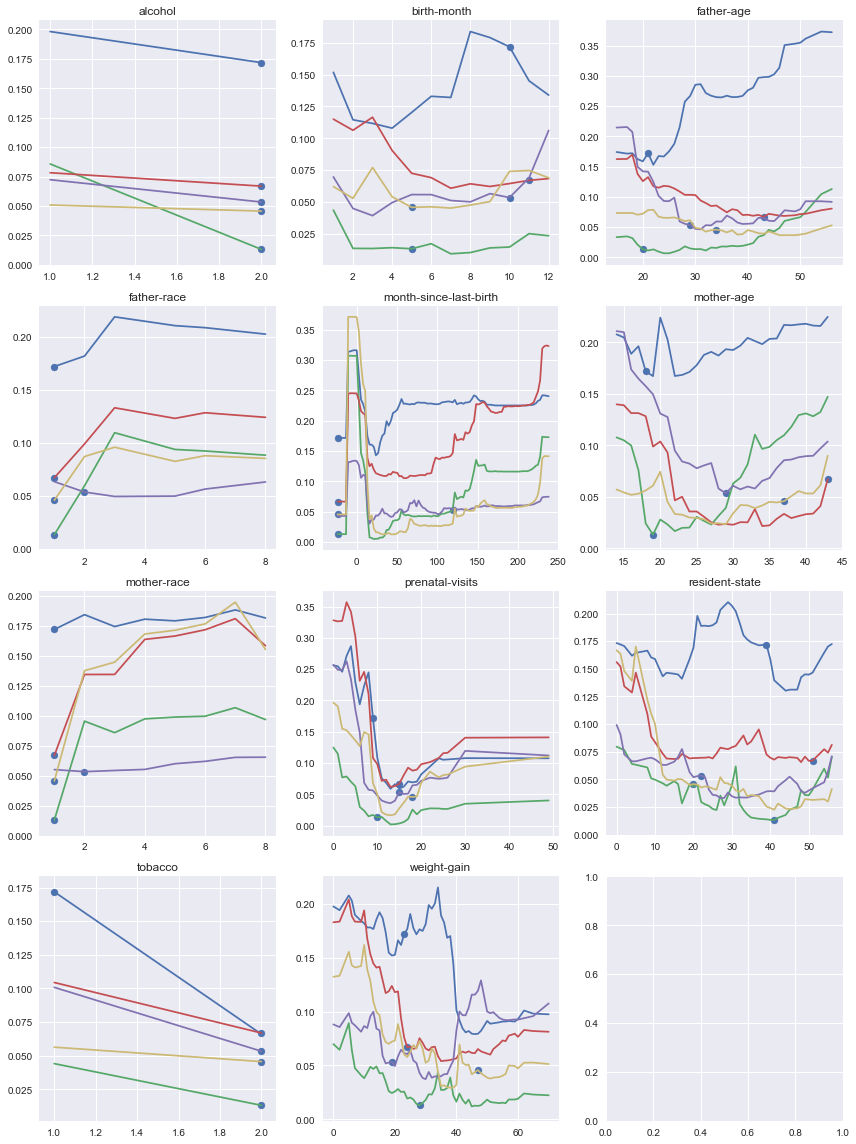

In [33]:
indices = mxr.feature_dependence_plots(num_pts=5)


In [ ]:
#Mother Race: Asian mothers are more likely to have underweight babies
#Alcohol and Tobacco: 1 yes--more likely to have underweight babies
#State: east part of central time zone, close to eastern time zone

In [34]:
indices

array([455, 122, 331,  91, 330])

## Divide the sample into high, medium, and low-risk groups, and aim for different precision/recall

In [35]:
#ensemble y probability prediction
y_prob_pred_ensemble=(y_prob_pred_gb *y_prob_pred_svm)**(.5)

#high-risk group
high_index=y_prob_pred_ensemble>0.15
# number of true 1's in high-risk group
A_high=np.sum(y_test[high_index])
#number of cases in high-risk group
B_high=len(y_test[high_index])
#number of true 1's overall
C=np.sum(y_test)
high_recall=A_high/C
high_precision=A_high/B_high

#medium-risk group
medium_index=(y_prob_pred_ensemble<=0.15) & (y_prob_pred_ensemble>0.05)
# number of true 1's in medium-risk group
A_medium=np.sum(y_test[medium_index])
#number of cases in medium-risk group
B_medium=len(y_test[medium_index])
#number of true 1's overall
C=np.sum(y_test)
medium_recall=A_medium/C
medium_precision=A_medium/B_medium

#low-risk group
low_index=(y_prob_pred_ensemble<=0.05) 
# number of true 1's in low-risk group
A_low=np.sum(y_test[low_index])
#number of cases in low-risk group
B_low=len(y_test[low_index])
#number of true 1's overall
C=np.sum(y_test)
low_recall=A_low/C
low_precision=A_low/B_low

list(zip(["high_recall","high_precision","medium_recall", "medium_precision",
     "low_recall","low_precision"],[high_recall,high_precision,medium_recall, medium_precision,
     low_recall,low_precision]))


[('high_recall', 0.19553072625698323),
 ('high_precision', 0.4666666666666667),
 ('medium_recall', 0.4748603351955307),
 ('medium_precision', 0.08341511285574092),
 ('low_recall', 0.329608938547486),
 ('low_precision', 0.03150026695141484)]

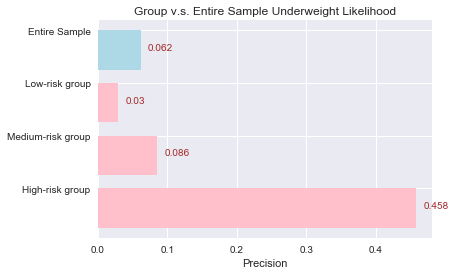

In [36]:
objects = ('High-risk group', 'Medium-risk group','Low-risk group','Entire Sample')
y_pos = len(objects)
precision = [0.458,0.086,0.030, 0.062]
 
# plt.bar(y_pos, recall, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Recall')
# plt.title('Risk Groups')

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(y_pos)  # the x locations for the groups
ax.barh(ind, precision, width, color=['pink','pink','pink','lightblue'])
ax.set_yticks(ind+width/2)
ax.set_yticklabels(objects, minor=False)
plt.title('Group v.s. Entire Sample Underweight Likelihood')
plt.xlabel('Precision')

for i, v in enumerate(precision):
    ax.text(v + 0.01, i +0.001, str(v), color='brown')

    
    
#data1.underweight.value_counts(),583/9307
#positive cases/total case=6.26%
##precision: true positive/total positive diagnosis:
 #high-risk group has precision 0.458. So if you are in the high group and you tested for having
    #underweight baby, then your chance of having a real underweight baby is 0.458, which is 7
    #times more likely than general population
 # medium-risk group: 1.4 times more likely
#recall: true positive/total positive cases:
 #high-risk group is capturing 18.4% of the total underweight babies



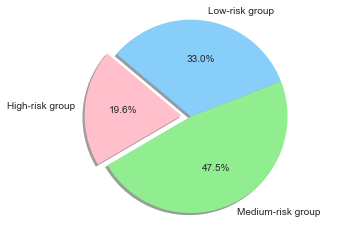

In [38]:
labels = 'High-risk group', 'Medium-risk group','Low-risk group'
sizes = [high_recall, medium_recall, low_recall]
colors = ['pink', 'lightgreen', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


## Model 3: Logistic Regression

In [39]:
X=data1.loc[:,selected_columns]
y=data1['underweight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)

In [40]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
list(zip(X.columns,lr_model.coef_[0]))


[('birth-month', 0.02565275473422108),
 ('father-age', 0.0022852616697498782),
 ('month-since-last-birth', -0.005458797245796179),
 ('mother-age', 0.0049529992796373693),
 ('prenatal-visits', -0.10483662045035776),
 ('resident-state', -0.0080800295532529962),
 ('weight-gain', -0.034200623460413464),
 ('alcohol', -0.021713422759977966),
 ('tobacco', -0.5786708545994026),
 ('mother-race', 0.095268207428202731),
 ('father-race', -0.0039870168753871711)]

In [41]:
lr_model.score(X_test,y_test)

0.93966970003370409

In [42]:
y_prob_pred_mat_lgs=lr_model.predict_proba(X_test)
y_prob_pred_lgs=y_prob_pred_mat_lgs[:,1]
#first comparison of metric: log-loss score, based on y_prob_pred
log_loss(y_test,y_prob_pred_lgs), roc_auc_score(y_test,y_prob_pred_lgs)

(0.21359406397514058, 0.67902342842028496)

In [43]:
# #hard prediction
# y_pred_lgs = lr_model.predict(X_test)
# print(classification_report(y_test,y_pred_lgs),confusion_matrix(y_test, y_pred_lgs)),\
# list(zip(['accuracy','precision','recall','f1'], [accuracy_score(y_test, y_pred_lgs),
#                                                   precision_score(y_test, y_pred_lgs),
#                                                   recall_score(y_test, y_pred_lgs),
#                                                   f1_score(y_test, y_pred_lgs)]))


In [44]:
# #choose a different threshold, lower the threshold for becoming a 1
# y_pred_lgs2 = (y_prob_pred_lgs>0.1).astype(int)
# print(classification_report(y_test,y_pred_lgs2),confusion_matrix(y_test, y_pred_lgs2)),\
# list(zip(['accuracy','precision','recall','f1'], [accuracy_score(y_test, y_pred_lgs2),
#                                                   precision_score(y_test, y_pred_lgs2,average='weighted'),
#                                                   recall_score(y_test, y_pred_lgs2,average='weighted'),
#                                                   f1_score(y_test, y_pred_lgs2,average='weighted')]))

# #want high recall in the 1.0 category s.t. when the baby is underweight
# #we have higher probability to predict that the baby is underweight
# #precision is low for 1.0 category: when I predict that baby is underweight, I'm correct 34% of time

## Graphing precision recall curves together

In [45]:
def pr_curve(truthvec, scorevec, digit_prec=2):
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    plt.plot(precisionvec,recallvec)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    return (recallvec, precisionvec, threshvec)

def log_lik_binary(truthvec, probvec):
    return np.sum((np.log(probvec)*truthvec) + (np.log(1-probvec)*(1-truthvec)))

In [46]:
# from brew.base import Ensemble
# from brew.base import EnsembleClassifier
# from brew.combination.combiner import Combiner

# # create your Ensemble
# clfs = [gbmodel, model_svm]
# ens = Ensemble(classifiers = clfs)

# # create your Combiner
# # the rules can be 'majority_vote', 'max', 'min', 'mean' or 'median'
# comb = Combiner(rule='min')

# # now create your ensemble classifier
# ensemble_clf = EnsembleClassifier(ensemble=ens, combiner=comb)
# y_prob_pred_mat_ensemble=ensemble_clf.predict_proba(X_test)
# y_prob_pred_ensemble=y_prob_pred_mat_ensemble[:,1]


/Users/Rachel/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide


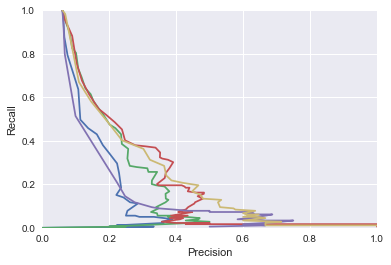

In [49]:
lr1_pr=pr_curve(y_test,y_prob_pred_lgs)
rf1_pr=pr_curve(y_test,y_prob_pred_rf)
gb1_pr=pr_curve(y_test, y_prob_pred_gb)
svm_pr=pr_curve(y_test, y_prob_pred_svm)
# y_prob_pred_ensemble=(y_prob_pred_gb *y_prob_pred_svm)**(0.5)
gb1_svm_ens1_pr = pr_curve(y_test, y_prob_pred_ensemble);


#gb1_svm_ens2_pr = pr_curve(y_test, (y_prob_pred_gb +y_prob_pred_svm)/2);


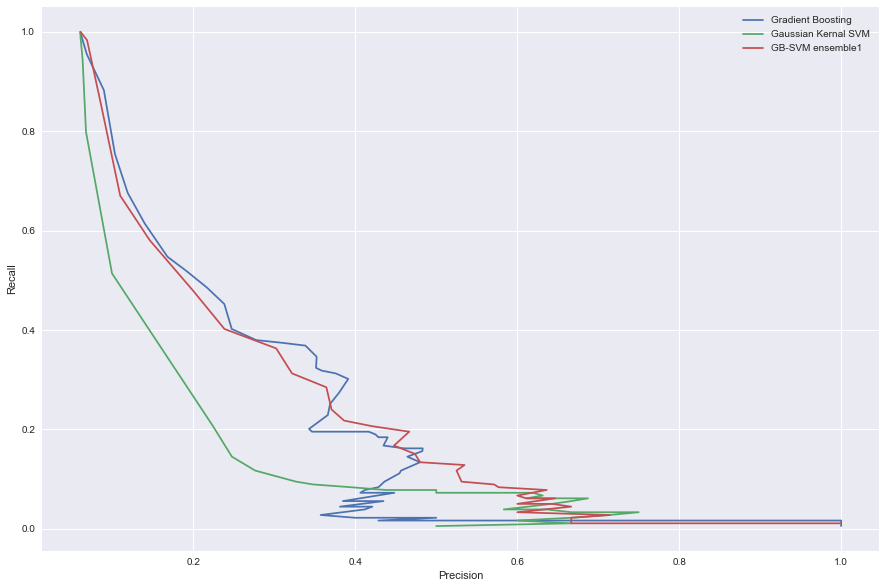

In [50]:
plt.figure(figsize=(15,10))

# plt.plot(lr1_pr[1],lr1_pr[0],label="Logistic Regression")
# plt.plot(rf1_pr[1],rf1_pr[0],label="Random Forest")
plt.plot(gb1_pr[1],gb1_pr[0],label="Gradient Boosting")
plt.plot(svm_pr[1],svm_pr[0],label="Gaussian Kernal SVM")
plt.plot(gb1_svm_ens1_pr[1],gb1_svm_ens1_pr[0],label='GB-SVM ensemble1')


plt.legend()
plt.xlabel('Precision')
plt.ylabel('Recall')


0.20140165889653239

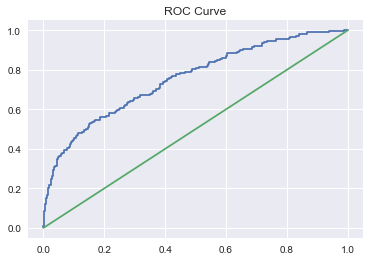

In [52]:
fpr, tpr, thresholds = roc_curve(y_test,y_prob_pred_ensemble)
plt.plot(fpr, tpr) #fpr=1-specificity=recall
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))
plt.title("ROC Curve")
roc_auc_score(y_test,y_prob_pred_ensemble)
log_loss(y_test, y_prob_pred_ensemble)